In [40]:
%load_ext autoreload
%autoreload 2
%reload_ext autoreload
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neural_network import MLPClassifier
from training import get_datasets, get_results
from joblib import load

def testing_without_vars(removed_var):
    if removed_var is None:
        print("Testing with all features")
        X_trains, X_tests, y_trains, y_tests = get_datasets(None)
    else:
        print(f"Testing without {removed_var}")
        X_trains, X_tests, y_trains, y_tests = get_datasets(removed_var)

    tree = ExtraTreesClassifier()
    mlp = MLPClassifier(hidden_layer_sizes=(8,8,8), activation='relu', solver='adam', max_iter=500, verbose=False)
    
    X_train_combined = pd.concat(X_trains, axis=0)
    X_test_combined = pd.concat(X_tests, axis=0)
    y_train_combined = pd.concat(y_trains, axis=0)
    y_test_combined = pd.concat(y_tests, axis=0)
    
    tree.fit(X_train_combined, y_train_combined)
    mlp.fit(X_train_combined, y_train_combined)
    
    print('Tree Performance: ')
    tree_predictions = tree.predict(X_test_combined.to_numpy())
    cm, acc, sen, spe = get_results(tree_predictions, y_test_combined.to_numpy())

    print("acc: ", round((acc*100),2))
    print("sen: ", round((sen*100),2))
    print("spe: ", round((spe*100),2))

    print('MLP Performance: ')
    mlp_predictions = mlp.predict(X_test_combined.to_numpy())
    cm, acc, sen, spe = get_results(mlp_predictions, y_test_combined.to_numpy())

    print("acc: ", round((acc*100),2))
    print("sen: ", round((sen*100),2))
    print("spe: ", round((spe*100),2))

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [33]:
tree = load('xai_models/tree_class_model.joblib')
mlp = load('xai_models/mlp_model.joblib')

X_trains, X_tests, y_trains, y_tests = get_datasets(None)
X_train_combined = pd.concat(X_trains, axis=0).reset_index(drop=True)
X_test_combined = pd.concat(X_tests, axis=0).reset_index(drop=True)
y_train_combined = pd.concat(y_trains, axis=0).reset_index(drop=True)
y_test_combined = pd.concat(y_tests, axis=0).reset_index(drop=True)

print('Tree Performance: ')
tree_predictions = tree.predict(X_test_combined.to_numpy())
cm, acc, sen, spe = get_results(tree_predictions, y_test_combined.to_numpy())

print("acc: ", round((acc*100),2))
print("sen: ", round((sen*100),2))
print("spe: ", round((spe*100),2))

print('MLP Performance: ')
mlp_predictions = mlp.predict(X_test_combined.to_numpy())
cm, acc, sen, spe = get_results(mlp_predictions, y_test_combined.to_numpy())

print("acc: ", round((acc*100),2))
print("sen: ", round((sen*100),2))
print("spe: ", round((spe*100),2))

Tree Performance: 
acc:  99.62
sen:  99.32
spe:  99.78
MLP Performance: 
acc:  99.59
sen:  99.71
spe:  99.52


C:\Users\GGPC\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but ExtraTreesClassifier was fitted with feature names
  warnings.warn(
C:\Users\GGPC\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(


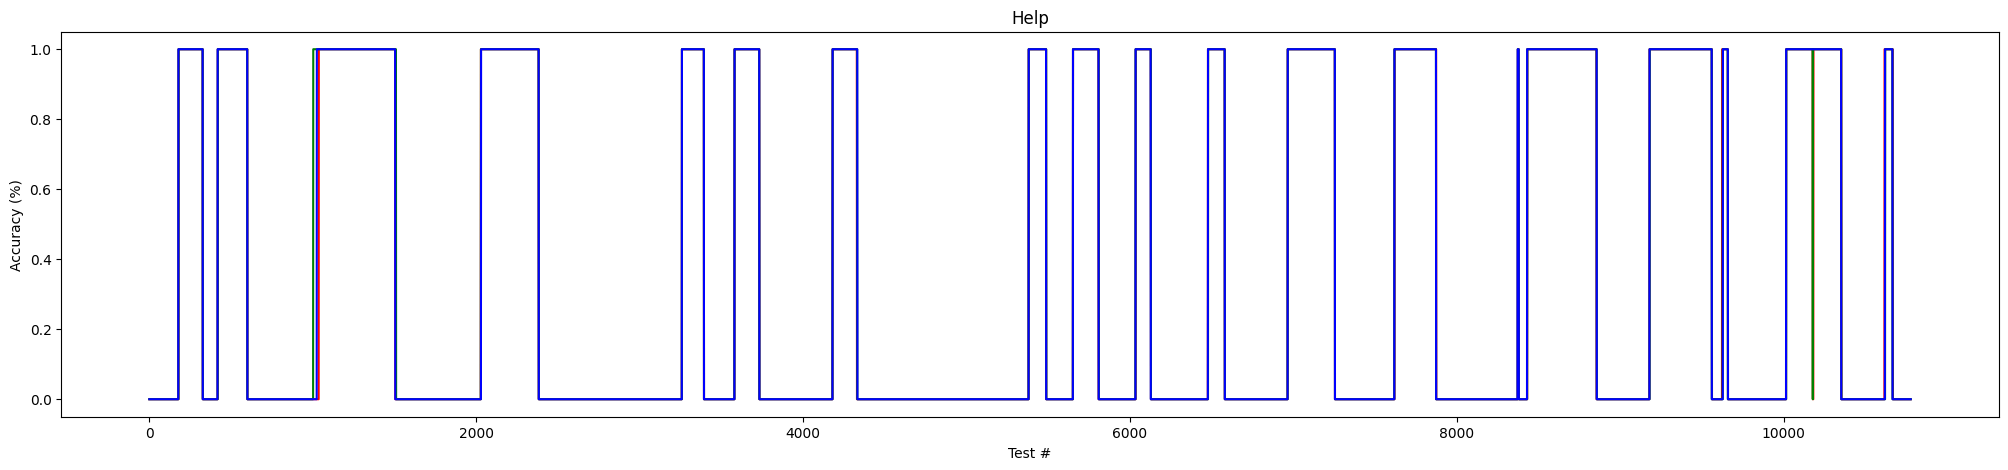

In [ ]:
plt.figure(figsize=(25,5))
plt.plot(y_test_combined, 'b')
plt.plot(tree_predictions, 'r')
plt.plot(mlp_predictions, 'g')
plt.title("Help")
plt.xlabel("Test #")
plt.ylabel("Accuracy (%)")
plt.show()

In [41]:
#testing without theta
testing_without_vars("theta")

Testing without theta
Tree Performance: 
acc:  96.82
sen:  99.04
spe:  95.59
MLP Performance: 
acc:  97.77
sen:  93.82
spe:  99.96


C:\Users\GGPC\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but ExtraTreesClassifier was fitted with feature names
  warnings.warn(
C:\Users\GGPC\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(


In [42]:
#testing without thetadot
testing_without_vars("thetadot")

Testing without thetadot
Tree Performance: 
acc:  97.57
sen:  94.47
spe:  99.28
MLP Performance: 
acc:  97.76
sen:  93.82
spe:  99.94


C:\Users\GGPC\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but ExtraTreesClassifier was fitted with feature names
  warnings.warn(
C:\Users\GGPC\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(


In [43]:
#testing without x
testing_without_vars("x")

Testing without x
Tree Performance: 
acc:  97.79
sen:  94.99
spe:  99.34
MLP Performance: 
acc:  97.45
sen:  99.77
spe:  96.17


C:\Users\GGPC\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but ExtraTreesClassifier was fitted with feature names
  warnings.warn(
C:\Users\GGPC\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(


In [44]:
#testing without xdot
testing_without_vars("xdot")

Testing without xdot
Tree Performance: 
acc:  78.26
sen:  70.46
spe:  82.57
MLP Performance: 
acc:  78.43
sen:  78.88
spe:  78.18


C:\Users\GGPC\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but ExtraTreesClassifier was fitted with feature names
  warnings.warn(
C:\Users\GGPC\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(


In [45]:
#testing without xdot
testing_without_vars(["x", "theta", "thetadot"])

Testing without ['x', 'theta', 'thetadot']
Tree Performance: 
acc:  99.31
sen:  98.93
spe:  99.52
MLP Performance: 
acc:  98.52
sen:  96.14
spe:  99.84


C:\Users\GGPC\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but ExtraTreesClassifier was fitted with feature names
  warnings.warn(
C:\Users\GGPC\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
